In [26]:
import pandas as pd
import numpy as np
from bs4 import BeautifulSoup
import requests
import re
from html5lib.html5parser import HTMLParser
import lxml
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
url = 'https://stockmarketmba.com/stocksinthesp500.php'

In [3]:
#Checking if website allows Scraping
r = requests.get(url)
r.status_code

200

In [43]:
#dfs = pd.read_html(url)

In [44]:
# Checking Number of tables
#len(dfs)

In [45]:
#data = dfs[0]
#data.head()

In [4]:
soup = BeautifulSoup(r.content)

In [5]:
table = soup.find_all('table')

In [41]:
df = pd.read_html(str(table))[0]
df

,Symbol,Description,Category2,Category3,GICS Sector,Market cap,Dividend yield,Price to TTM earnings,Price to TTM sales,Price to book value,Action
0,A,Agilent Technologies Inc,Common stocks,Large cap,Health Care,"$43,905,776,937",0.56%,35.96,6.81,8.41,Analyze
1,AAL,American Airlines Group Inc,Common stocks,Mid cap,Industrials,"$9,670,525,199",0.00%,-4.07,0.28,-1.08,Analyze
2,AAP,Advance Auto Parts Inc,Common stocks,Large cap,Consumer Discretionary,"$11,205,438,567",2.92%,17.93,1.02,3.53,Analyze
3,AAPL,Apple Inc,Common stocks,Large cap,Information Technology,"$2,381,445,264,600",0.61%,23.36,6.17,35.33,Analyze
4,ABBV,Abbvie Inc,Common stocks,Large cap,Health Care,"$265,555,033,081",3.70%,21.50,4.68,16.48,Analyze
...,...,...,...,...,...,...,...,...,...,...,...
499,ZBH,Zimmer Biomet Holdings Inc,Common stocks,Large cap,Health Care,"$24,250,542,420",0.83%,59.21,3.17,1.98,Analyze
500,ZBRA,Zebra Technologies Corp,Common stocks,Large cap,Information Technology,"$13,598,256,197",0.00%,15.95,2.38,4.47,Analyze
501,ZION,Zions Bancorporation,Common stocks,Mid cap,Financials,"$8,287,327,394",2.82%,8.13,3.00,1.27,Analyze
502,ZTS,Zoetis Inc,Common stocks,Large cap,Health Care,"$69,234,994,857",0.87%,32.93,8.77,14.65,Analyze


In [42]:
df = df.drop(['Action'], axis=1)
df['Dividend yield'] = df['Dividend yield'].str.replace('%','')
df['Market cap'] = df['Market cap'].str.replace('$','')
df['GICS Sector'] = df['GICS Sector'].replace(['Information technology'], 'Information Technology')
df.head()

/var/folders/1j/w25hhp1533z0g_xfs23lpb6c0000gn/T/ipykernel_21936/1515516107.py:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['Market cap'] = df['Market cap'].str.replace('$','')


,Symbol,Description,Category2,Category3,GICS Sector,Market cap,Dividend yield,Price to TTM earnings,Price to TTM sales,Price to book value
0,A,Agilent Technologies Inc,Common stocks,Large cap,Health Care,"43,905,776,937",0.56,35.96,6.81,8.41
1,AAL,American Airlines Group Inc,Common stocks,Mid cap,Industrials,"9,670,525,199",0.00,-4.07,0.28,-1.08
2,AAP,Advance Auto Parts Inc,Common stocks,Large cap,Consumer Discretionary,"11,205,438,567",2.92,17.93,1.02,3.53
3,AAPL,Apple Inc,Common stocks,Large cap,Information Technology,"2,381,445,264,600",0.61,23.36,6.17,35.33
4,ABBV,Abbvie Inc,Common stocks,Large cap,Health Care,"265,555,033,081",3.70,21.50,4.68,16.48


In [43]:
df['Dividend yield'] = df['Dividend yield'].astype('float')

In [44]:
df.dtypes

Symbol                    object
Description               object
Category2                 object
Category3                 object
GICS Sector               object
Market cap                object
Dividend yield           float64
Price to TTM earnings    float64
Price to TTM sales       float64
Price to book value      float64
dtype: object

#### 1. How many sectors are in the S&P 500 index and which sector has the most/least companies

In [45]:
print(df['GICS Sector'].value_counts())

Information Technology    75
Industrials               71
Financials                67
Health Care               64
Consumer Discretionary    56
Consumer Staples          33
Real Estate               31
Utilities                 30
Materials                 28
Communication Services    25
Energy                    23
Name: GICS Sector, dtype: int64


#### 1.1 Percentage of sticks per sector

In [35]:
print(round(df['GICS Sector'].value_counts()/503*100, 1))

Information Technology    14.9
Industrials               14.1
Financials                13.3
Health Care               12.7
Consumer Discretionary    11.1
Consumer Staples           6.6
Real Estate                6.2
Utilities                  6.0
Materials                  5.6
Communication Services     5.0
Energy                     4.6
Name: GICS Sector, dtype: float64


In [36]:
df.groupby(['Category3'])['Category3'].value_counts()

Category3  Category3
Large cap  Large cap    460
Mid cap    Mid cap       42
Small cap  Small cap      1
Name: Category3, dtype: int64

#### 2. Which sector has the highest mean of Dividend yield? 

In [37]:
round(df.groupby(['Category3','GICS Sector'])['Dividend yield'].mean(), 3)

Category3  GICS Sector           
Large cap  Communication Services    1.508
           Consumer Discretionary    1.124
           Consumer Staples          2.477
           Energy                    2.649
           Financials                2.070
           Health Care               0.946
           Industrials               1.321
           Information Technology    1.092
           Materials                 2.174
           Real Estate               3.254
           Utilities                 2.944
Mid cap    Communication Services    7.625
           Consumer Discretionary    2.425
           Financials                3.132
           Health Care               1.506
           Industrials               1.201
           Information Technology    0.540
           Materials                 2.140
           Real Estate               5.475
           Utilities                 5.810
Small cap  Consumer Staples          2.820
Name: Dividend yield, dtype: float64

#### 3. Which companies meet all recommendations

In [21]:
pe_ratio = df[(df['Price to TTM earnings'] >= 20) & 
              (df['Price to TTM earnings'] <= 25) &
              (df['Price to TTM sales'] >= 1) & 
              (df['Price to TTM sales'] <= 2) &
              (df['Price to book value'] < 3)]
pe_ratio

,Symbol,Description,Category2,Category3,GICS Sector,Market cap,Dividend yield,Price to TTM earnings,Price to TTM sales,Price to book value
144,DTE,DTE Energy,Common stocks,Large cap,Utilities,"22,136,959,892",3.07,24.26,1.37,2.47
169,ETR,Entergy Corp,Common stocks,Large cap,Utilities,"22,511,397,306",3.63,20.83,1.91,1.88
214,HAS,Hasbro Inc,Common stocks,Mid cap,Consumer Discretionary,"8,757,791,112",4.32,23.44,1.35,2.88
292,MAS,Masco Corp,Common stocks,Large cap,Industrials,"11,524,538,185",2.17,20.43,1.34,-30.22


#### 4. How do Dividend Yield, P/E ratio, P/S ratio and P/B ratio affect each other 

In [22]:
new_df = df
new_df['Market cap'] = new_df['Market cap'].str.replace('$','')
#new_df['Market cap'] = new_df['Market cap'].astype('float')
new_df.head()

/var/folders/1j/w25hhp1533z0g_xfs23lpb6c0000gn/T/ipykernel_21936/4128643268.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  new_df['Market cap'] = new_df['Market cap'].str.replace('$','')


,Symbol,Description,Category2,Category3,GICS Sector,Market cap,Dividend yield,Price to TTM earnings,Price to TTM sales,Price to book value
0,A,Agilent Technologies Inc,Common stocks,Large cap,Health Care,"43,905,776,937",0.56,35.96,6.81,8.41
1,AAL,American Airlines Group Inc,Common stocks,Mid cap,Industrials,"9,670,525,199",0.00,-4.07,0.28,-1.08
2,AAP,Advance Auto Parts Inc,Common stocks,Large cap,Consumer Discretionary,"11,205,438,567",2.92,17.93,1.02,3.53
3,AAPL,Apple Inc,Common stocks,Large cap,Information Technology,"2,381,445,264,600",0.61,23.36,6.17,35.33
4,ABBV,Abbvie Inc,Common stocks,Large cap,Health Care,"265,555,033,081",3.70,21.50,4.68,16.48


In [27]:
data = new_df[['Market cap','Dividend yield','Price to TTM earnings', 'Price to TTM sales', 'Price to book value']]
data.head()

,Market cap,Dividend yield,Price to TTM earnings,Price to TTM sales,Price to book value
0,"43,905,776,937",0.56,35.96,6.81,8.41
1,"9,670,525,199",0.00,-4.07,0.28,-1.08
2,"11,205,438,567",2.92,17.93,1.02,3.53
3,"2,381,445,264,600",0.61,23.36,6.17,35.33
4,"265,555,033,081",3.70,21.50,4.68,16.48


<function matplotlib.pyplot.show(close=None, block=None)>

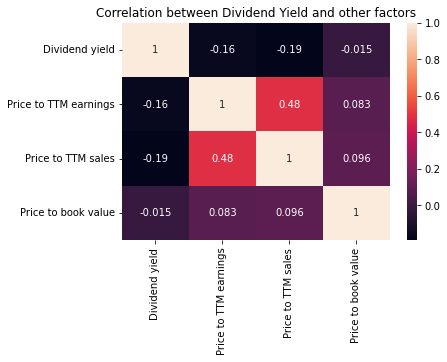

In [38]:
sns.heatmap(data.corr(), annot = True)
plt.title('Correlation between Dividend Yield and other factors')
plt.show

#### Relationship between Price to TTM earnings and Price to TTM sales 

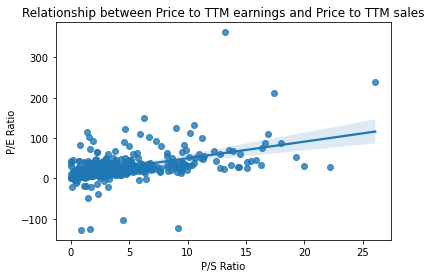

In [32]:
sns.regplot(data = df, x = 'Price to TTM sales', y = 'Price to TTM earnings')
plt.title('Relationship between Price to TTM earnings and Price to TTM sales')
plt.xlabel('P/S Ratio')
plt.ylabel('P/E Ratio')
plt.show()

The biger companies' sales are the biger their earnings are. 

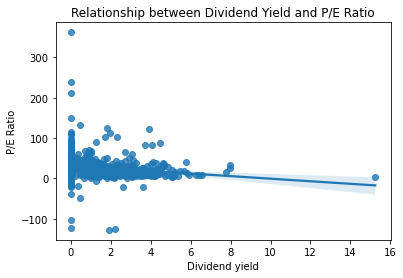

In [40]:
sns.regplot(data = df, x = 'Dividend yield', y = 'Price to TTM earnings')
plt.ylabel('P/E Ratio')
plt.title('Relationship between Dividend Yield and P/E Ratio')
plt.show()

The Plot above makes sense because mature and the most stables companies pay didvidends because they no longer invest all shareholders' money into growth, but pay dividends. These companies tend to have lower growth rate and lower P/E Ratio. Younger companies that focus on their growth, do not pay dividends because they reinvest the profits into their growth, which increases growth rate and PE/ Ratio.